In [ ]:
# implementing hinge loss in SVM

**Generate Dataset** linear dataset

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class = 1,random_state=3,n_features=2,n_informative=2,n_redundant=0)
print(X.shape)
print(Y.shape)


(400, 2)
(400,)


In [ ]:
# convert your label Y in 1 and -1 instead of 1 and 0
Y[Y==0] = -1
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

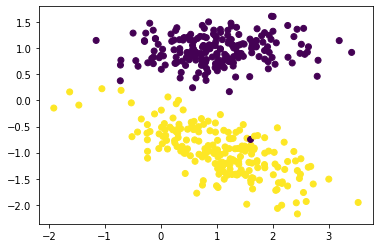

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()
#try to find one hyperplane for this dataset

In [ ]:
#insted of writing diff functions we are enclosing them in one class so that we can make as many classifiers as we want
class SVM:
  #this is a constructor(__init__())
  def __init__(self, C=1.0) :
    self.C = C
    self.W = 0
    self.b = 0

  def hingeLoss(self, W, b, X, Y):
    loss = 0.0

    loss += 0.5*np.dot(W,W.T)                #we are adding 1/2(w(transpose)w) to the loss first

    m = X.shape[0]

    for i in range(m):

      ti = Y[i]*(np.dot(W,X[i].T) + b)            #this ti is going to be scalar because we are computing ti for every example

      loss += self.C*max(0,(1-ti));

    return loss[0][0]

  def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, maxItr = 300):
    no_of_features = X.shape[1];
    no_of_samples = X.shape[0]; #it is nothing but m 

    n = learning_rate
    c = self.C

    #initialising the model parameters, we have two parameter one is w and other is bias term b
    W = np.zeros((1, no_of_features))  #weight matrix here is 1 X no.of features . We can also define it as no_of _features X 1
    bias = 0

    print(self.hingeLoss(W, bias, X, Y))


    #Training from here
    # we will use the weight and bias update rule
    # we are going to store every loss

    losses = []

    for i in range(maxItr):
      #training loop
      l = self.hingeLoss(W,bias, X, Y)
      losses.append(l)
      ids = np.arange(no_of_samples)
      np.random.shuffle(ids)

      #we need is batch gradient descent with random shuffling
      
      for batch_start in range(0, no_of_samples, batch_size):
        #assume 0 gradiesnt for batch

        gradw = 0  #let gradient descent with respect to weight w and bias b as 0
        gradb = 0

        for j in range(batch_start, batch_start+batch_size):
          if j<no_of_samples:   #bcz it is possible that we may go out of batch size
            i = ids[j]
            ti = Y[i]*(np.dot(W,X[i].T) + bias)

            if ti>1:
              gradw += 0
              gradb += 0
            
            else:
              gradw += c*Y[i]*X[i]
              gradb += c*Y[i]

        # grad for the batch is ready
        # update weight and bias accordingly

        W = W - n*W + n*gradw
        bias = bias + n*gradb
    
    self.W = W
    self.b = bias
    return W,bias,losses   

In [ ]:
mySVM = SVM()

In [ ]:
#checking hinge loss function
W,b,losses = mySVM.fit(X, Y, maxItr = 100)
#print(losses)
print(losses[0])
print(losses[-1])

400.0
400.0
14.964423010815844


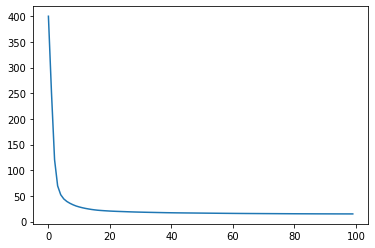

In [ ]:
plt.plot(losses)     
plt.show()

In [ ]:
W,B = mySVM.W, mySVM.b
print(W,B)

[[-0.32219761 -2.03406068]] 0.3850000000000003


In [ ]:
def plotHyperplane(w1,w2,b):

  plt.figure(figsize=(12,12))
  x_1 = np.linspace(-2,4,10) #it will generate 10 points in the range (-2,4)
  x_2 = -(w1*x_1+b)/w2
  plt.plot(x_1, x_2)

  plt.scatter(X[:,0],X[:,1],c = Y)
  plt.show()

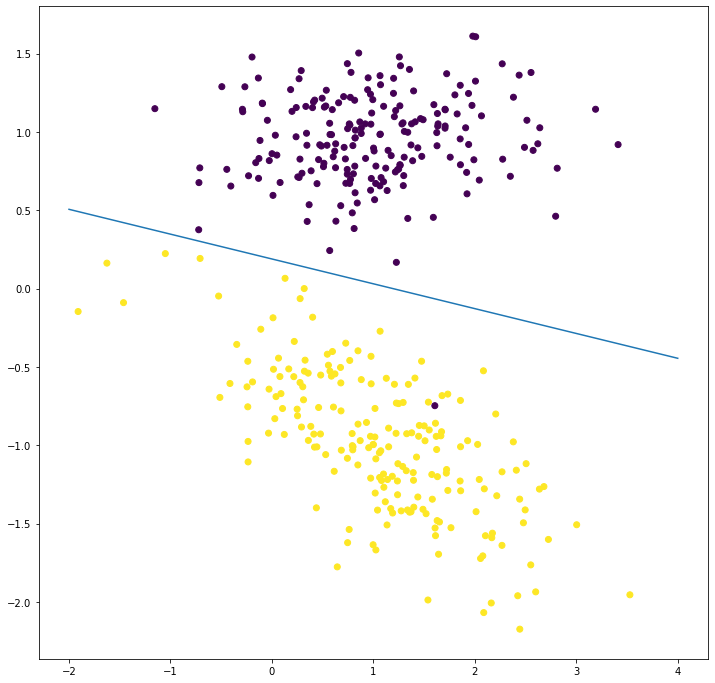

In [ ]:
plotHyperplane(W[0,0],W[0,1],B)